In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [91]:
df=pd.read_csv(r'E:\DATA SCIENCE\KAGGLE DATASETS\AIRCRASH DATA\Plane Crashes.csv')

In [92]:
df.shape # we have 28536 rows and 24 columns in this dataset

(28536, 24)

In [93]:
# lets drop some of the columns which are not usefull for us 
# Dropping Time,Registration,MSN,YOM,Flight no.,Schedule
df1=df.drop(['Time','Registration','Schedule','MSN','YOM','Flight no.'],axis=1)

In [94]:
# Check data types
df1.dtypes

Date                 object
Aircraft             object
Operator             object
Flight phase         object
Flight type          object
Survivors            object
Crash site           object
Crash location       object
Country              object
Region               object
Crew on board       float64
Crew fatalities     float64
Pax on board        float64
PAX fatalities      float64
Other fatalities    float64
Total fatalities      int64
Circumstances        object
Crash cause          object
dtype: object

In [95]:
# convert 'Date' column to datetime datatype
df1['Date'] = pd.to_datetime(df1['Date'], format="%Y/%m/%d")

In [96]:
df1.shape

(28536, 18)

<AxesSubplot:>

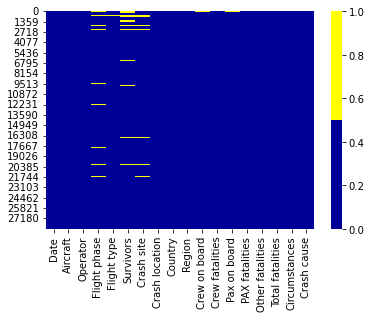

In [97]:
import seaborn as sns
cols = df1.columns 
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df1.isnull(),
            cmap=sns.color_palette(colours))

In [98]:
df1.isnull().sum()

Date                   0
Aircraft               1
Operator               0
Flight phase         638
Flight type           57
Survivors           1297
Crash site           383
Crash location        12
Country                1
Region                 1
Crew on board         24
Crew fatalities        1
Pax on board          54
PAX fatalities         1
Other fatalities      10
Total fatalities       0
Circumstances         25
Crash cause            0
dtype: int64

#### Lets not remove/ impute any missing values as each row is important in this case.

## 1. Analysing various reasons for Crash

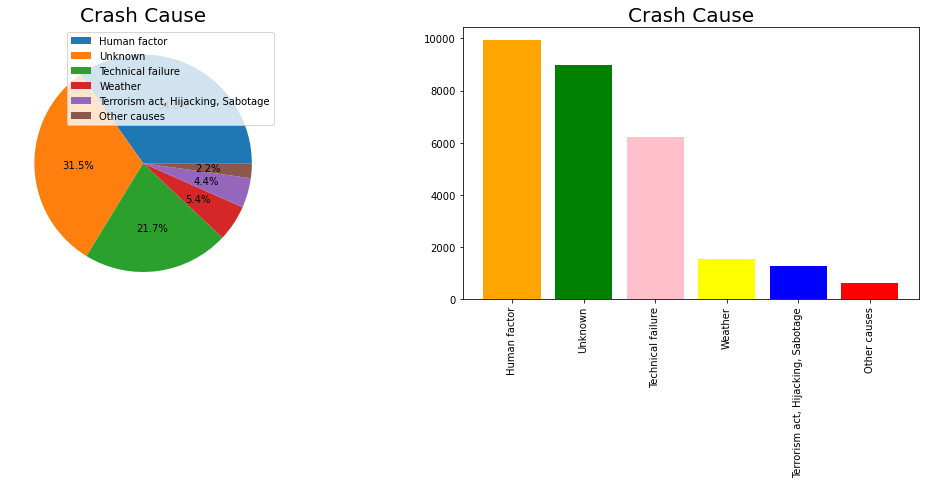

In [120]:
plt.figure(figsize=[18,5])
plt.subplot(1,2,1)
plt.title("Crash Cause",fontsize=20)
plt.pie(df1['Crash cause'].value_counts(),autopct="%1.1f%%")
plt.legend(df1['Crash cause'].value_counts().index.tolist(),loc='upper right')
plt.subplot(1,2,2)
height=df1['Crash cause'].value_counts()
bars=df1['Crash cause'].value_counts().index
y_pos = np.arange(len(bars))
my_colors = ['orange','green','pink','yellow','blue','red']
plt.bar(y_pos, height,color=my_colors)
plt.xticks(y_pos, bars)
plt.xticks(rotation=90)
plt.title("Crash Cause", size=20)
fig.tight_layout()
plt.show()

##### As we can see in above graphs, 34.8% of the crash has occured due to 'Human Factor

## 2. Now lets analyse the different Aircrafts that is involved in crash

<AxesSubplot:>

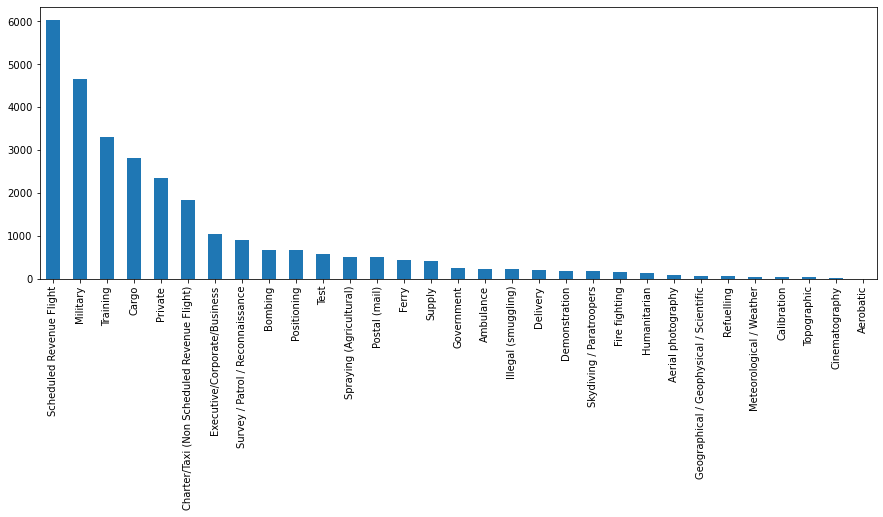

In [102]:
plt.figure(figsize=(15,5))
df1['Flight type'].value_counts().plot(kind='bar')

#### We see that planes belonging to 'Scheduled Revenue Flight' category  is involved in highest number of crashes followed by 'Military' category.

In [18]:
# Now lets try to analyse different models of Aircrafts that is involved in crash
Air_count=df1['Aircraft'].value_counts().rename_axis('Aircrafts').reset_index(name='Counts')
Air_count[:50]

,Aircrafts,Counts
0,Douglas C-47 Skytrain (DC-3),2171
1,PZL-Mielec AN-2,794
2,Curtiss C-46 Commando,638
3,Avro 652 Anson,532
4,De Havilland DH.60 Moth,450
5,Douglas DC-3,420
6,De Havilland DHC-2 Beaver,349
7,Britten-Norman Islander,341
8,Lockheed C-130 Hercules,326
9,Piper PA-31-310 Navajo,294


##### We can see Douglas C-47 Skytrain (DC-3) has involved in maximum number of accidents followed by PZL-Mielec AN-2

## 3. Boeing Vs Airbus 

In [121]:
#Seperating Boeing and Airbus Data
Boeing_data=Air_count[Air_count['Aircrafts'].str.contains('Boeing')]
Airbus_data=Air_count[Air_count['Aircrafts'].str.contains('Airbus')]

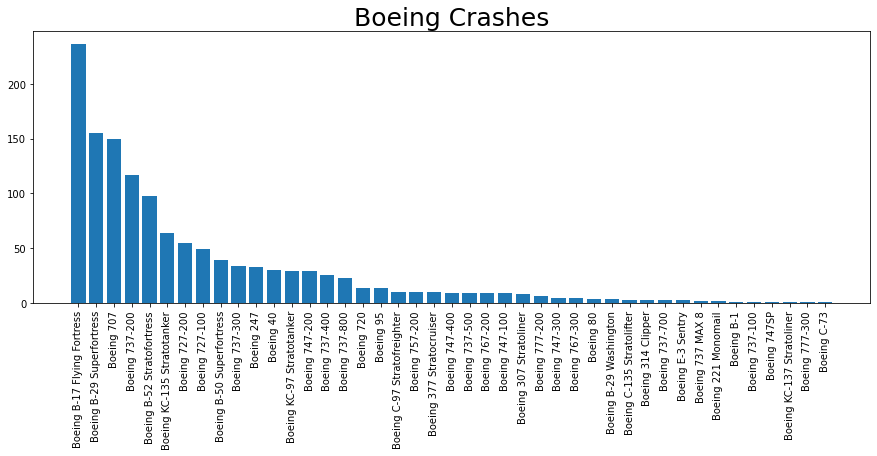

In [123]:
plt.figure(figsize=(15,5))
height=Boeing_data['Counts']
bars=Boeing_data['Aircrafts']
y_pos = np.arange(len(bars))
#my_colors = ['orange','green','pink','yellow','blue','red']
plt.bar(y_pos, height)
plt.xticks(y_pos, bars)
plt.xticks(rotation=90)
#plt.xlabel('Crash Causes', size=30)
#plt.ylabel("Count", size=30)
plt.title("Boeing Crashes", size=25)
plt.show()

#### 'Boeing B-17 Flying Fortress' has involved in the highest number of crashes	

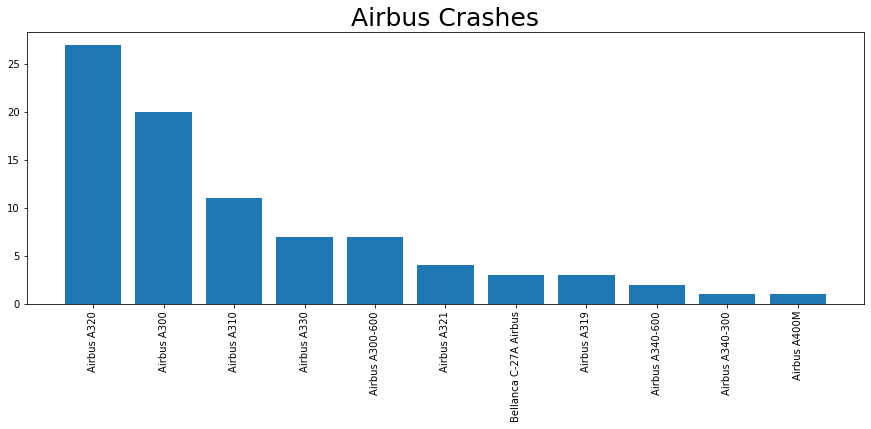

In [125]:
plt.figure(figsize=(15,5))
height=Airbus_data['Counts']
bars=Airbus_data['Aircrafts']
y_pos = np.arange(len(bars))
#my_colors = ['orange','green','pink','yellow','blue','red']
plt.bar(y_pos, height)
plt.xticks(y_pos, bars)
plt.xticks(rotation=90)
#plt.xlabel('Crash Causes', size=30)
#plt.ylabel("Count", size=30)
plt.title("Airbus Crashes", size=25)
plt.show()

In [126]:
comparision=pd.DataFrame({'Company':['Boeing','Airbus'],'Total_Crashes':[Boeing_data['Counts'].sum(),Airbus_data['Counts'].sum()]})
comparision

,Company,Total_Crashes
0,Boeing,1315
1,Airbus,86


<BarContainer object of 2 artists>

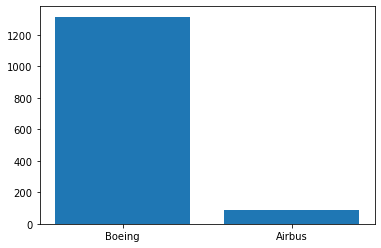

In [127]:
plt.bar(comparision['Company'],comparision['Total_Crashes'])

##### We see that Boeing manufactured airoplanes have highest number(15 time more) of crash rate when compared to Airbus[ from 1918 - 2022 ].

## Lets find out why Boeing crash rate is higher

In [128]:
# we see that in this dataset we have crash data for different types of aircrafts 
# i.e 'Scheduled revenue Flight', 'Military', 'training' etc
# We know that chances of Military flights crashing is higher when compared to 'Scheduled revenue Flight'
# so lets only include 'Scheduled revenue Flight'

In [129]:
df1.head(2)

,Date,Aircraft,Operator,Flight phase,Flight type,Survivors,Crash site,Crash location,Country,Region,Crew on board,Crew fatalities,Pax on board,PAX fatalities,Other fatalities,Total fatalities,Circumstances,Crash cause
0,1918-05-02,De Havilland DH.4,United States Signal Corps - USSC,Takeoff (climb),Test,No,Airport (less than 10 km from airport),Dayton-McCook Field Ohio,United States of America,North America,2.0,2.0,0.0,0.0,0.0,2,The single engine airplane departed Dayton-McC...,Technical failure
1,1918-06-08,Handley Page V/1500,Handley Page Aircraft Company Ltd,Takeoff (climb),Test,Yes,Airport (less than 10 km from airport),Cricklewood London Metropolis,United Kingdom,Europe,6.0,5.0,0.0,0.0,0.0,5,"Assembled at Cricklewood Airfield in May 1918,...",Technical failure


In [28]:
# filter 'Scheduled revenue Flight'
df2=df1[df1['Flight type']=='Scheduled Revenue Flight']
df2

,Date,Aircraft,Operator,Flight phase,Flight type,Survivors,Crash site,Crash location,Country,Region,Crew on board,Crew fatalities,Pax on board,PAX fatalities,Other fatalities,Total fatalities,Circumstances,Crash cause
31,1919-03-23,Unnamed aircraft,Private French,Flight,Scheduled Revenue Flight,Yes,"Plain, Valley",Bordeaux Gironde,France,Europe,2.0,0.0,0.0,0.0,0.0,0,"In flight, the crew encountered engine problem...",Technical failure
32,1919-04-07,Unnamed aircraft,Private French,Landing (descent or approach),Scheduled Revenue Flight,Yes,"Plain, Valley",France All France,France,Europe,NaN,0.0,NaN,0.0,0.0,0,Crashed in unknow circumstances somewhere in F...,Technical failure
45,1919-05-19,Farman F.60 Goliath,Private French,Landing (descent or approach),Scheduled Revenue Flight,NaN,"Plain, Valley",Belgium All Belgium,Belgium,Europe,NaN,0.0,NaN,0.0,0.0,0,NaN,Unknown
49,1919-05-31,Blackburn R.T.1 Kangaroo,Grahame-White Aviation,Takeoff (climb),Scheduled Revenue Flight,Yes,Airport (less than 10 km from airport),Hendon Middlesex,United Kingdom,Europe,1.0,0.0,2.0,0.0,0.0,0,"Shortly after takeoff, during initial climb, t...",Technical failure
66,1919-08-15,Armstrong Whitworth F.K.8,London %26 Provincial Aviation,Flight,Scheduled Revenue Flight,Yes,"Plain, Valley",Great Yarmouth Norfolk,United Kingdom,Europe,1.0,0.0,1.0,0.0,0.0,0,The aircraft crashed in unknown circumstances ...,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28507,2022-02-15,Britten-Norman Islander,Air Flamenco,Landing (descent or approach),Scheduled Revenue Flight,Yes,Airport (less than 10 km from airport),Culebra Island All Puerto Rico,Puerto Rico,Central America,0.0,0.0,0.0,0.0,0.0,0,"Upon landing on runway 13 at Culebra Airport, ...",Unknown
28511,2022-02-26,Cessna 208B Grand Caravan,AB Aviation,Flight,Scheduled Revenue Flight,No,"Lake, Sea, Ocean, River",Mohéli All Comoros Islands,Comoros Islands,Africa,2.0,2.0,12.0,12.0,0.0,14,The single engine airplane departed Moroni Air...,Unknown
28513,2022-03-21,Boeing 737-800,China Eastern Airlines,Flight,Scheduled Revenue Flight,No,Mountains,Wuzhou Guangxi,China,Asia,9.0,9.0,123.0,123.0,0.0,132,The airplane departed Kunming-Wujiaba Airport ...,Unknown
28530,2022-05-12,Airbus A319,Tibet Airlines,Takeoff (climb),Scheduled Revenue Flight,Yes,Airport (less than 10 km from airport),Chongqing-Jiangbei Sichuan,China,Asia,9.0,0.0,113.0,0.0,0.0,0,The airplane was departing Chongqing-Jiangbei ...,Unknown


In [29]:
df2.shape

(6035, 18)

In [36]:
#lets futher filter out Boeing and Airbus Data 
# list of Boeing Aircrafts
Boeing_fi1=df2[df2['Aircraft'].str.contains('Boeing')]
Boeing_fi1[:3]

,Date,Aircraft,Operator,Flight phase,Flight type,Survivors,Crash site,Crash location,Country,Region,Crew on board,Crew fatalities,Pax on board,PAX fatalities,Other fatalities,Total fatalities,Circumstances,Crash cause
922,1928-02-26,Boeing 40,Boeing Air Transport,Flight,Scheduled Revenue Flight,Yes,"Plain, Valley",Marquette Nebraska,United States of America,North America,1.0,1.0,1.0,0.0,0.0,1,"En route from Omaha to Cheyenne, the pilot los...",Technical failure
944,1928-04-17,Boeing 40,Boeing Air Transport,Flight,Scheduled Revenue Flight,Yes,"Plain, Valley",Federal Way Washington,United States of America,North America,1.0,0.0,1.0,1.0,0.0,1,"While flying in heavy snow falls, the pilot lo...",Weather
1014,1928-07-13,Boeing B-1,Western Canada Airways,Flight,Scheduled Revenue Flight,Yes,"Lake, Sea, Ocean, River",Graham Reach British Columbia,Canada,North America,1.0,0.0,2.0,0.0,0.0,0,"En route, the pilot encountered low visibility...",Human factor


In [37]:
# list of Airbus Aircrafts
Airbus_fi1=df2[df2['Aircraft'].str.contains('Airbus')]
Airbus_fi1[:3]

,Date,Aircraft,Operator,Flight phase,Flight type,Survivors,Crash site,Crash location,Country,Region,Crew on board,Crew fatalities,Pax on board,PAX fatalities,Other fatalities,Total fatalities,Circumstances,Crash cause
19465,1982-03-17,Airbus A300,Air France,Takeoff (climb),Scheduled Revenue Flight,Yes,Airport (less than 10 km from airport),Sana'a Sana'a (<U+0635><U+0646><U+0639><U+0627...,Yemen,Asia,13.0,0.0,111.0,0.0,0.0,0,During the takeoff roll at Sana'a Intl Airport...,Technical failure
19990,1983-12-18,Airbus A300,Malaysian Airlines System - MAS,Landing (descent or approach),Scheduled Revenue Flight,Yes,Airport (less than 10 km from airport),Kuala Lumpur-Subang-Sultan Abdul Aziz Shah Sel...,Malaysia,Asia,14.0,0.0,233.0,0.0,0.0,0,Following an uneventful flight from Singapore-...,Human factor
20777,1986-09-29,Airbus A300,Indian Airlines,Takeoff (climb),Scheduled Revenue Flight,Yes,Airport (less than 10 km from airport),Chennai Tamil Nadu,India,Asia,11.0,0.0,185.0,0.0,0.0,0,"During taxiing for takeoff, the commander gave...",Other causes


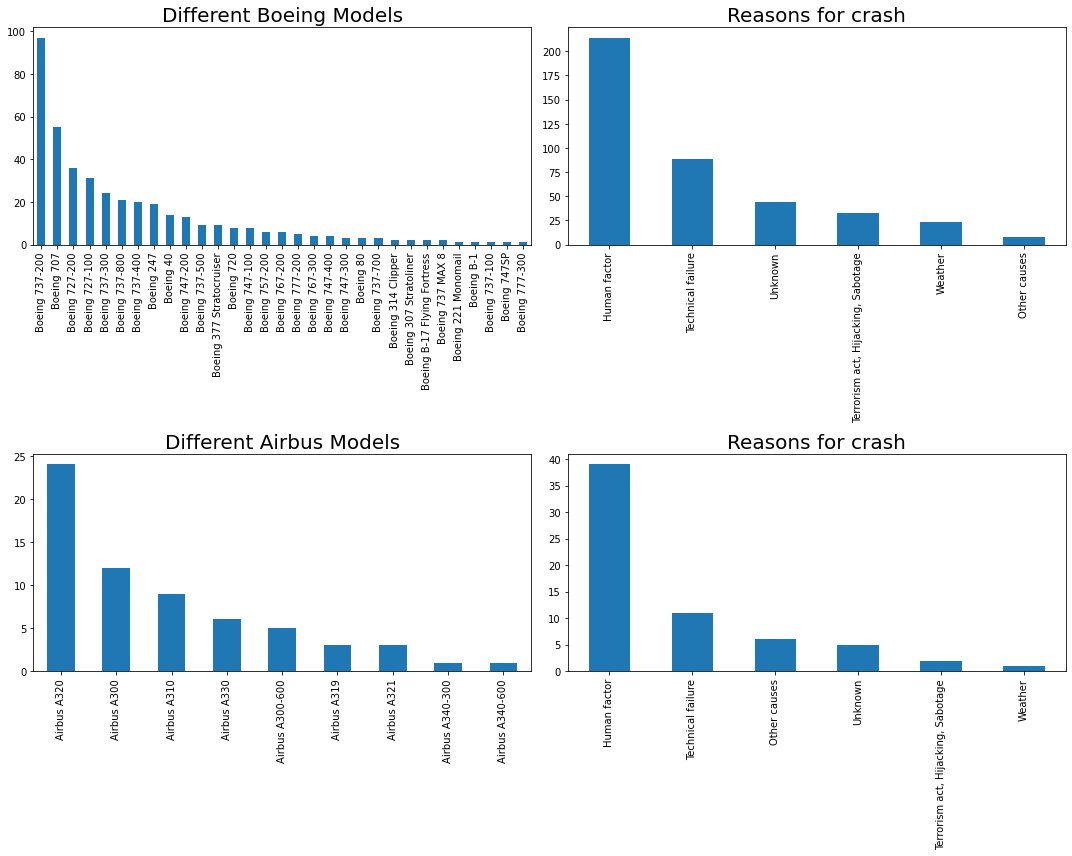

In [132]:
fig=plt.figure(figsize=[15,12])
plt.subplot(2,2,1)
Boeing_fi1['Aircraft'].value_counts().plot(kind='bar')
plt.title("Different Boeing Models", size=20)
plt.subplot(2,2,2)
Boeing_fi1['Crash cause'].value_counts().plot(kind='bar')
plt.title("Reasons for crash", size=20)
plt.subplot(2,2,3)
Airbus_fi1['Aircraft'].value_counts().plot(kind='bar')
plt.title("Different Airbus Models", size=20)
plt.subplot(2,2,4)
Airbus_fi1['Crash cause'].value_counts().plot(kind='bar')
plt.title("Reasons for crash", size=20)
fig.tight_layout()
plt.show()

Boeing 737-200 has a history of most number of crashses and most number of crashes are due to Human factor.

Airbus A320 has highest number of crashes and most of the crashes are due to Human factor


In [40]:
Crash_data=pd.DataFrame({"Company":["Boeing","Airbus"],"Crash_Count":[Boeing_fi1['Aircraft'].count(),Airbus_fi1['Aircraft'].count()]})
Crash_data

,Company,Crash_Count
0,Boeing,411
1,Airbus,64


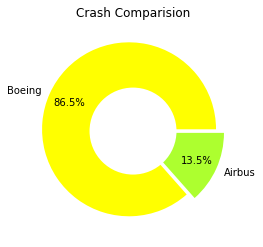

In [42]:
colors = ['#FFFF00', '#ADFF2F']
# explosion
explode = (0.05, 0.05)
plt.pie(Crash_data['Crash_Count'], labels=Crash_data['Company'],
        autopct='%1.1f%%', pctdistance=0.75,colors=colors,explode=explode)
  
# draw circle
centre_circle = plt.Circle((0, 0), 0.50, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
  
# Adding Title of chart
plt.title('Crash Comparision')
  
# Displaying Chart
plt.show()

#### We see huge difference here, now lets understand why ?
#### Boeing has been around since 1916, while Airbus started in 1969. It’s evident that Boeing is operating years ahead of Airbus.
#### This is the reason why Boeing crash numbers are higher
#### so it is not fair to compare without considering the time frame.
#### To make a fair comparison lets only consider past 10 years of data i.e from 2010 onwards

# Boeing Or Airbus -  Which is safe?

In [43]:
#Considering data from 2020 onwards and Considering only 'Scheduled Revenue Flight type
start_date='2010-01-01'
df3=df2[df2['Date'] > start_date]
df3[:3]

,Date,Aircraft,Operator,Flight phase,Flight type,Survivors,Crash site,Crash location,Country,Region,Crew on board,Crew fatalities,Pax on board,PAX fatalities,Other fatalities,Total fatalities,Circumstances,Crash cause
26656,2010-01-07,Saab 340,Sky Bahamas,Parking,Scheduled Revenue Flight,Yes,Airport (less than 10 km from airport),Nassau-Lynden Pindling New Providence,Bahamas,Central America,2.0,0.0,0.0,0.0,0.0,0,Two crew took place in the cockpit to prepare ...,Human factor
26669,2010-01-24,Tupolev TU-154,Taban Airlines,Landing (descent or approach),Scheduled Revenue Flight,Yes,Airport (less than 10 km from airport),Mashhad Razavi Khorasan,Iran,Asia,13.0,0.0,157.0,0.0,0.0,0,The three engine aircraft departed Abadan for ...,Human factor
26670,2010-01-25,Embraer EMB-110 Bandeirante,Piquiatuba Taxi Aéreo,Landing (descent or approach),Scheduled Revenue Flight,Yes,Airport (less than 10 km from airport),Senador José Porfírio Pará,Brazil,South America,2.0,1.0,8.0,1.0,0.0,2,"Following an uneventful flight from Belém, the...",Technical failure


In [44]:
#lets futher filter out Boeing and Airbus Data 
# list of Boeing Aircrafts
Boeing_fi2=df3[df3['Aircraft'].str.contains('Boeing')]
Boeing_fi2[:3]

,Date,Aircraft,Operator,Flight phase,Flight type,Survivors,Crash site,Crash location,Country,Region,Crew on board,Crew fatalities,Pax on board,PAX fatalities,Other fatalities,Total fatalities,Circumstances,Crash cause
26671,2010-01-25,Boeing 737-800,Ethiopian Airlines,Takeoff (climb),Scheduled Revenue Flight,No,"Lake, Sea, Ocean, River",Beirut Beirut Governorate,Lebanon,Asia,8.0,8.0,82.0,82.0,0.0,90,"On 25 January 2010, at 00:41:30 UTC, Ethiopian...",Human factor
26684,2010-03-01,Boeing 737-200,Air Tanzania,Landing (descent or approach),Scheduled Revenue Flight,Yes,Airport (less than 10 km from airport),Mwanza Mwanza Region,Tanzania,Africa,4.0,0.0,76.0,0.0,0.0,0,"After landing at Mwanza Airport, the crew enco...",Unknown
26702,2010-04-13,Boeing 737-300,Merpati Nusantara Airlines - MNA,Landing (descent or approach),Scheduled Revenue Flight,Yes,Airport (less than 10 km from airport),Manokwari Special Region of West Papua,Indonesia,Asia,7.0,0.0,103.0,0.0,0.0,0,"On 13 April 2010, a Boeing B737-300 aircraft r...",Human factor


In [45]:
# list of Airbus Aircrafts
Airbus_fi2=df3[df3['Aircraft'].str.contains('Airbus')]
Airbus_fi2[:3]

,Date,Aircraft,Operator,Flight phase,Flight type,Survivors,Crash site,Crash location,Country,Region,Crew on board,Crew fatalities,Pax on board,PAX fatalities,Other fatalities,Total fatalities,Circumstances,Crash cause
26713,2010-05-12,Airbus A330,Afriqiyah Airways,Landing (descent or approach),Scheduled Revenue Flight,Yes,Airport (less than 10 km from airport),Tripoli Tripoli (<U+0637><U+0631><U+0627><U+06...,Libya,Africa,11.0,11.0,93.0,92.0,0.0,103,The aircraft was on a schedule flight from O. ...,Human factor
26760,2010-07-28,Airbus A321,Airblue,Landing (descent or approach),Scheduled Revenue Flight,No,Mountains,Islamabad Islamabad Capital Territory (<U+0648...,Pakistan,Asia,6.0,6.0,146.0,146.0,0.0,152,"Flight ABQ202, operated by Airblue, was schedu...",Human factor
26791,2010-09-24,Airbus A319,Wind Jet,Landing (descent or approach),Scheduled Revenue Flight,Yes,Airport (less than 10 km from airport),Palermo-Punta Raisi Sicily,Italy,Europe,5.0,0.0,124.0,0.0,0.0,0,Following an uneventful flight from Rome-Fiumi...,Human factor


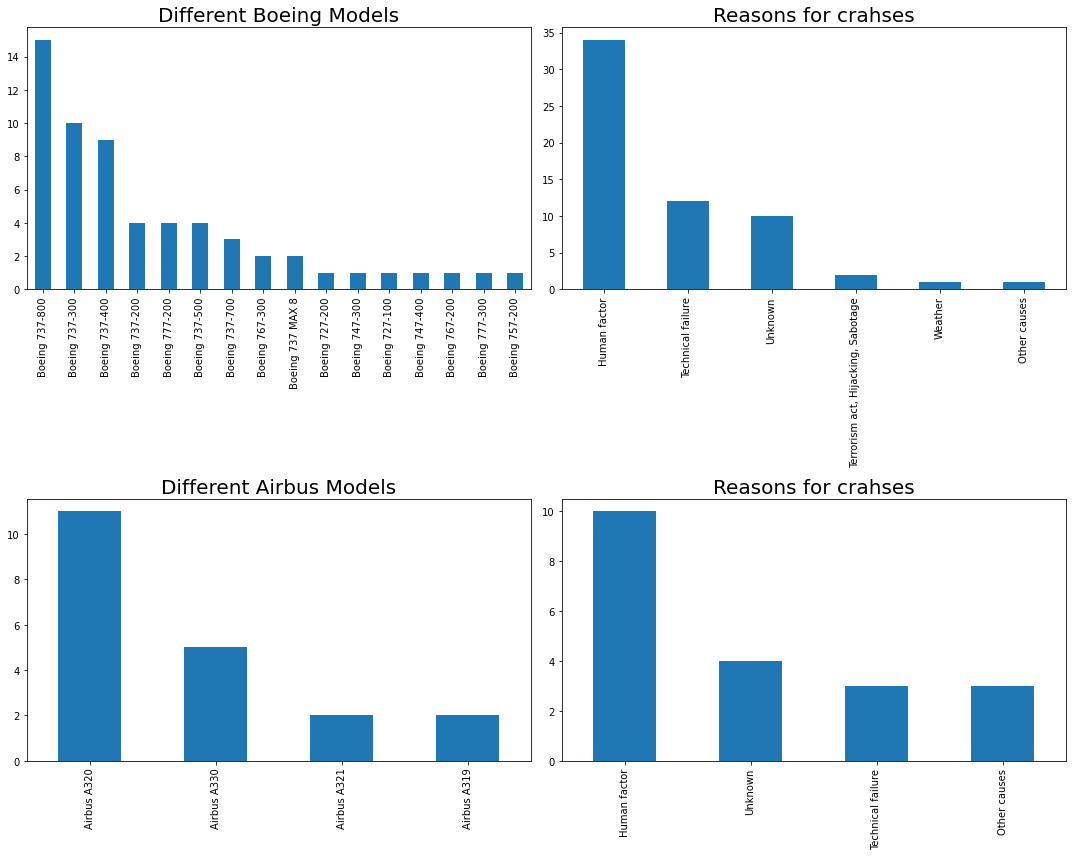

In [46]:
fig=plt.figure(figsize=[15,12])
plt.subplot(2,2,1)
Boeing_fi2['Aircraft'].value_counts().plot(kind='bar')
plt.title("Different Boeing Models", size=20)
plt.subplot(2,2,2)
Boeing_fi2['Crash cause'].value_counts().plot(kind='bar')
plt.title("Reasons for crahses", size=20)
plt.subplot(2,2,3)
Airbus_fi2['Aircraft'].value_counts().plot(kind='bar')
plt.title("Different Airbus Models", size=20)
plt.subplot(2,2,4)
Airbus_fi2['Crash cause'].value_counts().plot(kind='bar')
plt.title("Reasons for crahses", size=20)
fig.tight_layout()
plt.show()

In [47]:
Crash_data2=pd.DataFrame({"Company":["Boeing","Airbus"],"Crash_Count":[Boeing_fi2['Aircraft'].count(),Airbus_fi2['Aircraft'].count()]})
Crash_data2

,Company,Crash_Count
0,Boeing,60
1,Airbus,20


### Considering over 13 years of past data, we can conclude Airbus is the safest plane to travel
### Among othe Airbus models 'Airbus-A319' can be considered as the safest
### On the other hand 'Boeing 737-800' and Airbus A320 can be considered as the dangerous aircraft to travel
### Note: We cannot blame aircraft manufacturers for every crash because human factor should also be considered, but here i am only considering number of crashes

In [48]:
# now lets se casualities from the crashes in past 13 years
df3[:3]

,Date,Aircraft,Operator,Flight phase,Flight type,Survivors,Crash site,Crash location,Country,Region,Crew on board,Crew fatalities,Pax on board,PAX fatalities,Other fatalities,Total fatalities,Circumstances,Crash cause
26656,2010-01-07,Saab 340,Sky Bahamas,Parking,Scheduled Revenue Flight,Yes,Airport (less than 10 km from airport),Nassau-Lynden Pindling New Providence,Bahamas,Central America,2.0,0.0,0.0,0.0,0.0,0,Two crew took place in the cockpit to prepare ...,Human factor
26669,2010-01-24,Tupolev TU-154,Taban Airlines,Landing (descent or approach),Scheduled Revenue Flight,Yes,Airport (less than 10 km from airport),Mashhad Razavi Khorasan,Iran,Asia,13.0,0.0,157.0,0.0,0.0,0,The three engine aircraft departed Abadan for ...,Human factor
26670,2010-01-25,Embraer EMB-110 Bandeirante,Piquiatuba Taxi Aéreo,Landing (descent or approach),Scheduled Revenue Flight,Yes,Airport (less than 10 km from airport),Senador José Porfírio Pará,Brazil,South America,2.0,1.0,8.0,1.0,0.0,2,"Following an uneventful flight from Belém, the...",Technical failure


In [49]:
casuality_data=pd.DataFrame({"Company":["Boeing","Airbus"],"Total_Casuality":[Boeing_fi2['Total fatalities'].sum(),Airbus_fi2['Total fatalities'].sum()]})
casuality_data

,Company,Total_Casuality
0,Boeing,2029
1,Airbus,731


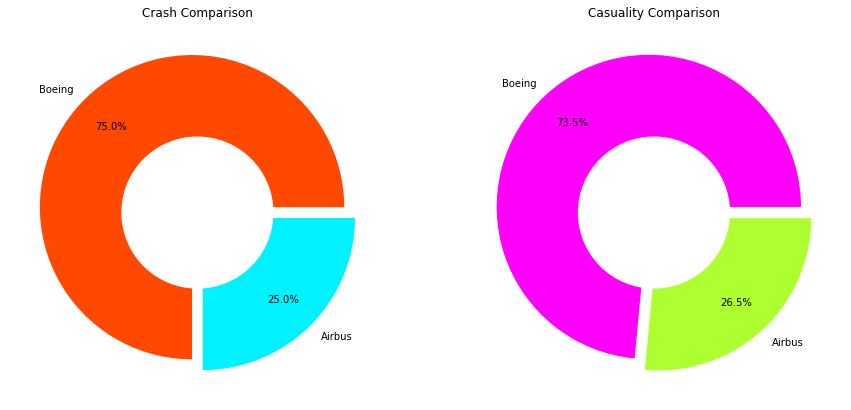

In [50]:
fig=plt.figure(figsize=[15,12])
plt.subplot(1,2,1)
colors = ['#ff4800', '#00f2ff']
explode = (0.05, 0.05)
plt.pie(Crash_data2['Crash_Count'], labels=Crash_data2['Company'],
        autopct='%1.1f%%', pctdistance=0.75,colors=colors,explode=explode)
centre_circle = plt.Circle((0, 0), 0.50, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Crash Comparison')
plt.subplot(1,2,2)
colors = ['#ff00fb', '#ADFF2F']
explode = (0.05, 0.05)
plt.pie(casuality_data['Total_Casuality'], labels=Crash_data2['Company'],
        autopct='%1.1f%%', pctdistance=0.75,colors=colors,explode=explode)
centre_circle = plt.Circle((0, 0), 0.50, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Casuality Comparison')
plt.show()

Clearly we can see Number of crashes and Casuality is more in Boeing Aircrafts when compared to Airbus

In [55]:
# Now lets check which Operator has highest number of crashes
# This is also an important aspect while analysing crash data
# Because Operators are the one who hires pilots and other staffs to manage airlines
# We have already seen that majority of crash occur due to Human factor, it may be due to lack of training/ineffcient pilots
# So opertor playes manjor role here

In [56]:
Operator_data=df3['Operator'].value_counts().rename_axis('Operator').reset_index(name='Crash_Counts')
Operator_data

,Operator,Crash_Counts
0,Pakistan International Airlines - PIA,5
1,Sriwijaya Air,4
2,Merpati Nusantara Airlines - MNA,4
3,Air Kasai,3
4,Tara Air,3
...,...,...
223,Inter Iles Air,1
224,Perimeter Aviation,1
225,EasySky,1
226,Fly My Sky,1


In [133]:
# Ignoring operators with crash = 1
Operator_data_fil=Operator_data[Operator_data['Crash_Counts']>1]
Operator_data_fil[:6]

,Operator,Crash_Counts
0,Pakistan International Airlines - PIA,5
1,Sriwijaya Air,4
2,Merpati Nusantara Airlines - MNA,4
3,Air Kasai,3
4,Tara Air,3
5,Aerocon - Aero Comercial Oriente Norte,3


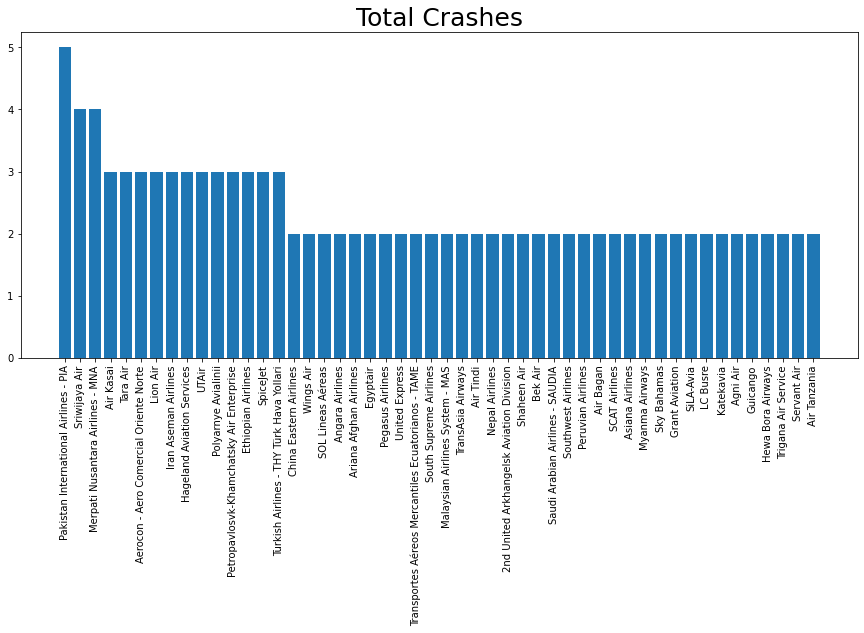

In [58]:
fig=plt.figure(figsize=[15,6])
height=Operator_data_fil['Crash_Counts']
bars=Operator_data_fil['Operator']
y_pos = np.arange(len(bars))
#my_colors = ['orange','green','pink','yellow','blue','red']
plt.bar(y_pos, height)
plt.xticks(y_pos, bars)
plt.xticks(rotation=90)
#plt.xlabel('Crash Causes', size=30)
#plt.ylabel("Count", size=30)
plt.title("Total Crashes", size=25)
plt.show()

Pakistan International Airlines - PIA	has the highest number of crashes in past 13 years(with 5 crashes)

# Now lets check in which Fight phase the crashes occur the most

In [59]:
Flight_phase_data=df3['Flight phase'].value_counts().rename_axis('Flight phase').reset_index(name='Crash_Counts')
Flight_phase_data

,Flight phase,Crash_Counts
0,Landing (descent or approach),195
1,Takeoff (climb),51
2,Flight,38
3,Taxiing,8
4,Parking,5


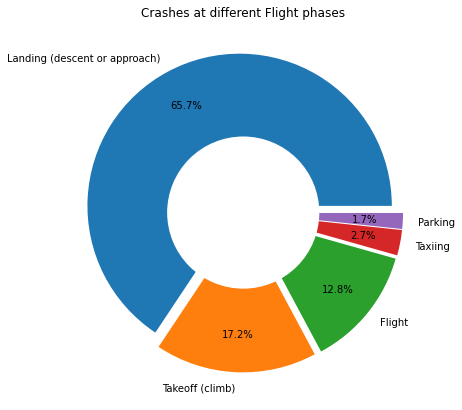

In [60]:
fig=plt.figure(figsize=[15,12])
plt.subplot(1,2,1)
explode = (0.05, 0.05, 0.05, 0.05, 0.05)
plt.pie(Flight_phase_data['Crash_Counts'], labels=Flight_phase_data['Flight phase'],
        autopct='%1.1f%%', pctdistance=0.75,explode=explode)
centre_circle = plt.Circle((0, 0), 0.50, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Crashes at different Flight phases')
plt.show()

#### In aviation industry, Landing is considered as the most critical phase of a flight
#### Most of the accidents happen during Landing and Takeoff. Above graph justifies this claims

# Summary of the Analysis

### General Insights:

1. When we consider data from 1918 to 2022, Douglas C-47 Skytrain (DC-3) has involved in maximum number of accidents (2171 crahes) followed by PZL-Mielec AN-2(794 crashes).
2. Most of the accident happened due to 'Human Factor' (9926 crashes) followed by ' Unknown reasons' (8989 crashes)
3. Number of crashes are reducing with years this may be due to technology advancements

### Boing vs Airbus comparison ( data from 2010)
These are two of the largest aerospace and defense manufacturers in the world. This is the reason why i have focussed only on these 2 manufacturers.

1. When we consider all types of flights i.e. 'Scheduled revenue flight', 'Military', 'Training' etc :

    a. Boeing B-17 Flying Fortress has involved in most number of crashes(236) in Boeing lineup.
    
    b. Airbus A320 has involved in most number of crashes in Airbus lineup.


2. When we consider only 'Scheduled Revenue Flight' :

    a. Boeing 737-200 and Airbus A320 has involved in most number of crashes.


3. Insights from past 13 years of data for 'Scheduled Revenue Flight' category to understand risk of fight travel:

    a. Boeing aircrafts has involved in 75% of the crashes when compared to Airbus with 25% crashes.
    
    b. Boeing 737-800 and Airbus A320 has highest number of crashes when compared to other models.
    
    c. When compared to all other models from both Boeing and Airbus, Airbus A319 can be considered as athe safest plane.
    
    d. We can conclude that Airbus is much safer when compared to Boeing considering total number of crashes.
    
    
4. Pakistan International Airlines - PIA (with 5 crashes) and Sriwijaya Air(with 4 crashes) can be considered as dangerous operator to fly.


5. Most of the accidents has happend during Landing (descent or approach)(195 crashes) followed by Takeoff (climb)(51 crashes).
    
    

# Lets do some more visualizations . . .

### 1. WordCloud

In [61]:
from wordcloud import WordCloud, STOPWORDS

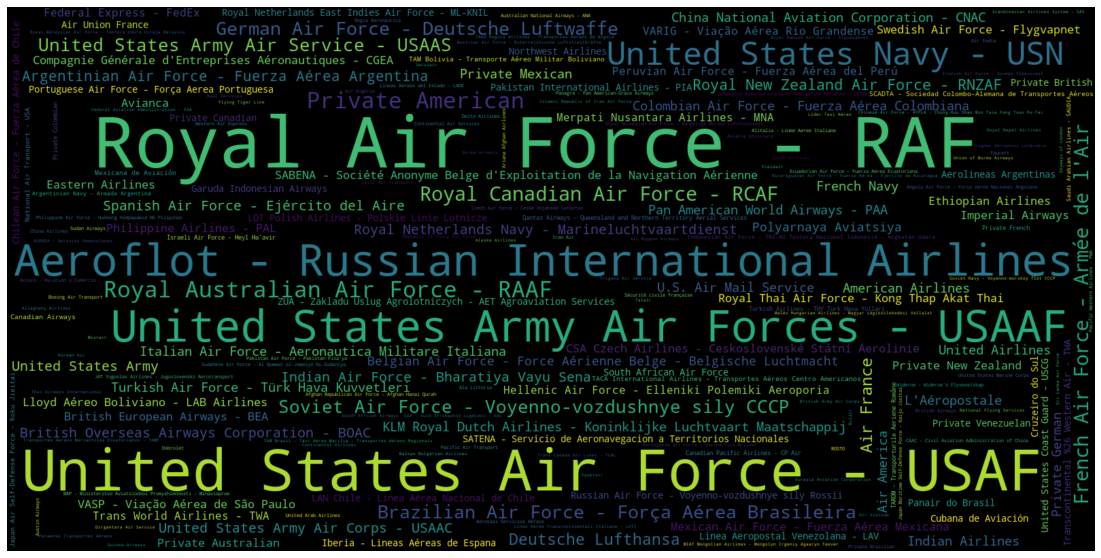

In [62]:
# Wordcloud showing Operators involved in Crashes
Operator_wordcloud = df['Operator'].value_counts().to_dict()
wc = WordCloud(width=1600, height=800).generate_from_frequencies(Operator_wordcloud) # to get high quality image
plt.figure( figsize=(20,10) )
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

We see 'Royal Air Force - RAF', 'United State Air Force' in larger fonts which means these operators are involved in more number of crashes

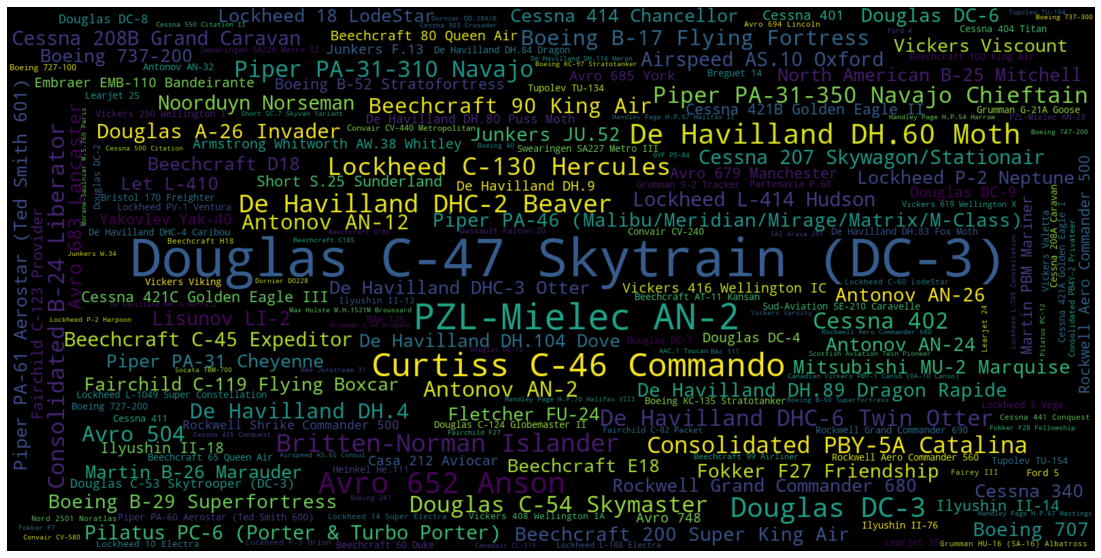

In [63]:
# Wordcloud showing Operators involved in Crashes
Aircraft_wordcloud = df['Aircraft'].value_counts().to_dict()
wc = WordCloud(width=1600, height=800).generate_from_frequencies(Aircraft_wordcloud) # to get high quality image
plt.figure( figsize=(20,10) )
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

We see 'Douglas C-47 Skytrain (DC-3)' and 'PZM - Mielec AN-2' in bigger fonts which means these 2 aircrafts crashed the most

## 2. Line Plot

In [69]:
df_line1=df1.copy()

In [70]:
df_line1['Year']=df_line1.Date.dt.year
df_line1=df_line1[['Year','Total fatalities']]

In [71]:
df_line1=df_line1.groupby('Year').count()
df_line1

,Total fatalities
Year,
1918,25
1919,83
1920,127
1921,138
1922,106
...,...
2018,131
2019,145
2020,113


Text(0.5, 1.0, 'Total Crashes Vs Year')

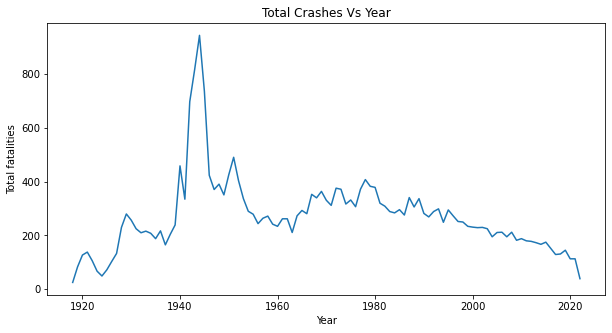

In [73]:
plt.figure( figsize=(10,5) )
sns.lineplot(x='Year',y='Total fatalities',data=df_line1)
plt.title("Total Crashes Vs Year")

We see that number of crashes has reduced over the years, this is due to technology advancements